In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
from keras.models import Model
from keras.layers import Input, Embedding,SpatialDropout1D, Bidirectional, GRU
from keras.layers import Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from keras.preprocessing import text, sequence 
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('omw-1.4')

[nltk_data] Error loading stopwords: [WinError 10054] An existing
[nltk_data]     connection was forcibly closed by the remote host
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
data = pd.read_csv('twitter_sentiment_data.csv')

data

sentiment                                            message  \
0             -1  @tiniebeany climate change is an interesting h...   
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...   
3              1  RT @Mick_Fanning: Just watched this amazing do...   
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...   
...          ...                                                ...   
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...   
43939          1  What will your respective parties do to preven...   
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...   
43941          0  RT @taehbeingextra: i still can$q$t believe th...   
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...   

                  tweetid  
0      792927353886371840  
1      793124211518832641  
2      793124402388832256  
3      793124635873275904  
4      793125156185137153  
...                   ...  
43938  791307031919550464  
43939  791316857403936768  
43940  791357509101621249  
43941  791390042136641537  
43942  791401610308038656  

[43943 rows x 3 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
data.describe()

sentiment       tweetid
count  43943.000000  4.394300e+04
mean       0.853924  8.367966e+17
std        0.853543  8.568506e+16
min       -1.000000  5.926334e+17
25%        0.000000  7.970376e+17
50%        1.000000  8.402301e+17
75%        1.000000  9.020003e+17
max        2.000000  9.667024e+17

In [7]:
data['message']

0        @tiniebeany climate change is an interesting h...
1        RT @NatGeoChannel: Watch #BeforeTheFlood right...
2        Fabulous! Leonardo #DiCaprio's film on #climat...
3        RT @Mick_Fanning: Just watched this amazing do...
4        RT @cnalive: Pranita Biswasi, a Lutheran from ...
                               ...                        
43938    Dear @realDonaldTrump,\nYeah right. Human Medi...
43939    What will your respective parties do to preven...
43940    RT @MikkiL: UN Poll Shows Climate Change Is th...
43941    RT @taehbeingextra: i still can$q$t believe th...
43942    @Likeabat77 @zachhaller \n\nThe wealthy + foss...
Name: message, Length: 43943, dtype: object

In [8]:
data=data.drop(['tweetid'],axis=1)
data

sentiment                                            message
0             -1  @tiniebeany climate change is an interesting h...
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...
3              1  RT @Mick_Fanning: Just watched this amazing do...
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...
...          ...                                                ...
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...
43939          1  What will your respective parties do to preven...
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...
43941          0  RT @taehbeingextra: i still can$q$t believe th...
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...

[43943 rows x 2 columns]

<AxesSubplot:>

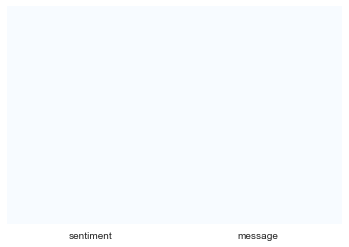

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

array([[<AxesSubplot:title={'center':'sentiment'}>]], dtype=object)

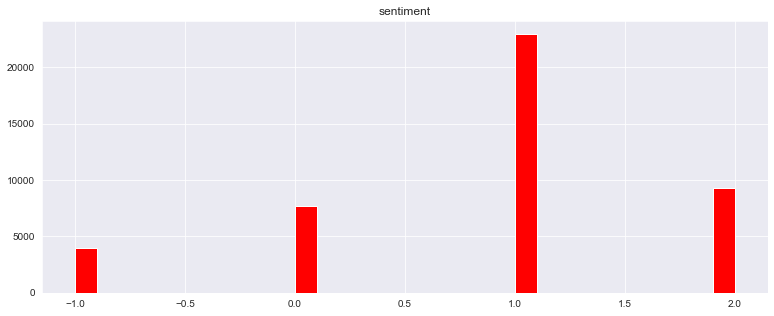

In [10]:
data.hist(bins=30,figsize=(13,5),color='r')

In [11]:
data['length'] = data['message'].apply(len)
data

sentiment                                            message  length
0             -1  @tiniebeany climate change is an interesting h...     137
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...     146
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...     117
3              1  RT @Mick_Fanning: Just watched this amazing do...     143
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...     139
...          ...                                                ...     ...
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...     115
43939          1  What will your respective parties do to preven...      83
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...     101
43941          0  RT @taehbeingextra: i still can$q$t believe th...     138
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...     140

[43943 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

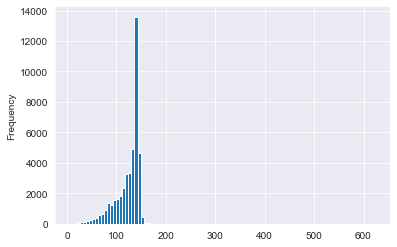

In [12]:
data['length'].plot(bins = 100, kind='hist')

In [13]:
data.describe()

sentiment        length
count  43943.000000  43943.000000
mean       0.853924    122.823954
std        0.853543     24.720780
min       -1.000000      7.000000
25%        0.000000    111.000000
50%        1.000000    133.000000
75%        1.000000    140.000000
max        2.000000    623.000000

Shortest tweet

In [14]:
data[data['length']==7]['message'].iloc[0]

'Err:501'

In [15]:
neutral = data[data['sentiment']==0]
neutral

sentiment                                            message  length
5              0  Unamshow awache kujinga na iko global warming ...      69
8              0  RT @AmericanIndian8: Leonardo DiCaprio's clima...     146
23             0  National GeographicÃ¢â‚¬â„¢s climate change do...     136
27             0  @ShellenbergerMD @DrSimEvans @bradplumer @Jiga...     118
31             0  RT @TheFilmStage: Leonardo DiCaprio's climate ...     128
...          ...                                                ...     ...
43916          0  Trolls , Games they play &amp; Global Warming ...      78
43919          0  @tommasomatic @Noahpinion I$q$ll take the glob...      71
43924          0  RT @caitlinmacneal: Ron Johnson says climate c...     144
43928          0  RT @primate7: Watch Leonardo DiCaprio’s Climat...     112
43941          0  RT @taehbeingextra: i still can$q$t believe th...     138

[7715 rows x 3 columns]

In [16]:
pro = data[data['sentiment']==1]
pro

sentiment                                            message  length
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...     146
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...     117
3              1  RT @Mick_Fanning: Just watched this amazing do...     143
9              1  #BeforeTheFlood Watch #BeforeTheFlood right he...     135
10             1  RT @DrDeJarnett: It's vital that the public he...     146
...          ...                                                ...     ...
43934          1  #Awareness Walls aren$q$t answer to people fle...     141
43936          1  #AikBaatSuniThi \nGlobal warming has negative ...      83
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...     115
43939          1  What will your respective parties do to preven...      83
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...     140

[22962 rows x 3 columns]

In [17]:
anti = data[data['sentiment']==-1]
anti

sentiment                                            message  length
0             -1  @tiniebeany climate change is an interesting h...     137
20            -1  @marie_dunkley arseholes couldn't predict tomo...     126
125           -1  @AngieNBC6 you do understand that climate chan...     137
286           -1  RT @trojan719: Why don't you fucking global wa...     103
337           -1  RT @realDonaldTrump: It's freezing outside, wh...      80
...          ...                                                ...     ...
43917         -1             RT @braintwat: https://t.co/GCF7F8B6g0      38
43926         -1  @CNN @ABC @CBS @NBC @MSNBC @Foxnews Another RE...     134
43929         -1             #FactsAreTruth https://t.co/EoSSillfbE      38
43931         -1  Global warming provides a great excuse for glo...     141
43935         -1  RT @PrisonPlanet: Americans More Scared of Clo...      94

[3990 rows x 3 columns]

In [18]:
news = data[data['sentiment']==2]
news

sentiment                                            message  length
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...     139
6              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...     139
7              2  RT @CCIRiviera: Presidential Candidate #Donald...     142
14             2  RT @WorldResources: Reflections on Leonardo Di...     153
30             2  Pentagon video about the future of cities pred...     138
...          ...                                                ...     ...
43915          2  GOP Senator On Climate Change: $q$Mankind Has ...     133
43921          2  Climate change may cause next financial meltdo...     109
43932          2  RT @nereusprogram: Climate change could cause ...     123
43937          2  RT @cnni: Leonardo DiCaprio: $q$Not one questi...     144
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...     101

[9276 rows x 3 columns]

In [19]:
sentences = data['message'].tolist()
sentences

['@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom',
 'RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦',
 "Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube",
 'RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im',
 'RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦',
 'Unamshow awache kujinga na iko global warming https://t.co/mhIflU7M1X',
 'RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦',
 'RT @CCIRiviera: Presidential Candidate #DonaldTrump is Ã¢â‚¬Å“dangerousÃ¢

In [20]:
len(sentences)

43943

In [21]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

"@tiniebeany climate change is an interesting hustle as it was global warming but the planet stopped warming for 15 yes while the suv boom RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦ Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube RT @Mick_Fanning: Just watched this amazing documentary by leonardodicaprio on climate change. We all think thisÃ¢â‚¬Â¦ https://t.co/kNSTE8K8im RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦ Unamshow awache kujinga na iko global warming https://t.co/mhIflU7M1X RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦ RT @CCIRiviera: Presidential Candidate #DonaldTrump is Ã¢â‚¬Å“dangerousÃ¢â‚¬ï†\x9d on climate change, 

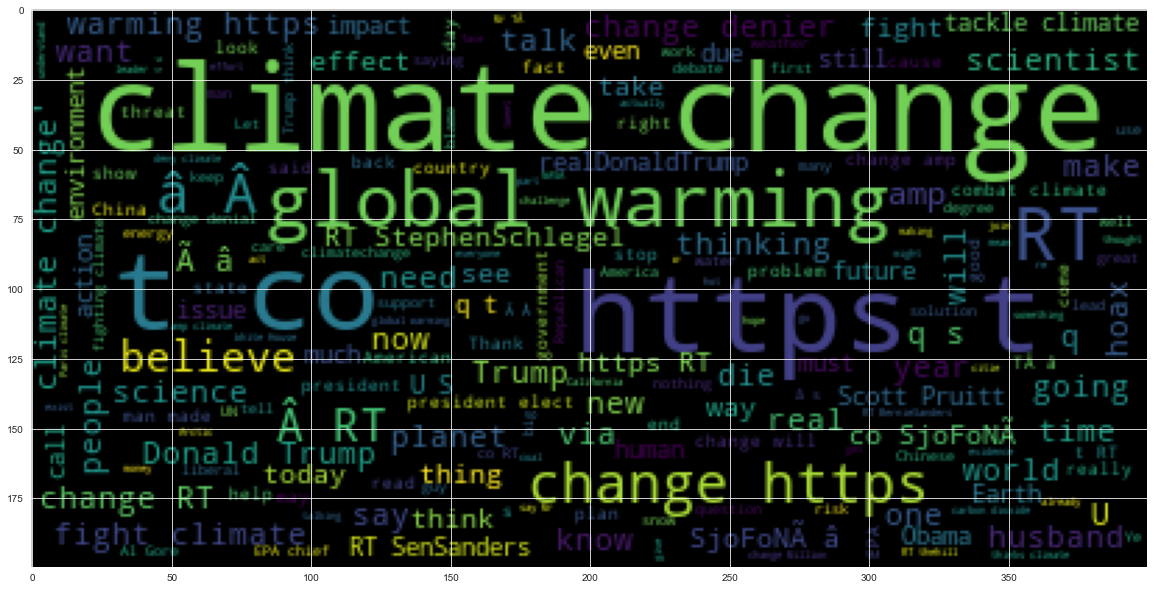

In [22]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [23]:
data

sentiment                                            message  length
0             -1  @tiniebeany climate change is an interesting h...     137
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...     146
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...     117
3              1  RT @Mick_Fanning: Just watched this amazing do...     143
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...     139
...          ...                                                ...     ...
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...     115
43939          1  What will your respective parties do to preven...      83
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...     101
43941          0  RT @taehbeingextra: i still can$q$t believe th...     138
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...     140

[43943 rows x 3 columns]

Removing punctuation and  stopwords



In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def message_cleaning(message):
  test_punc_removed = [char for char in message if char not in string.punctuation]
  test_punc_removed_join = ''.join(test_punc_removed)
  test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
  return test_punc_removed_join_clean

In [26]:
data_clean = data['message'].apply(message_cleaning)
print(data_clean[4])

['RT', 'cnalive', 'Pranita', 'Biswasi', 'Lutheran', 'Odisha', 'gives', 'testimony', 'effects', 'climate', 'change', 'amp', 'natural', 'disasters', 'poÃ¢â‚¬Â¦']


In [27]:
print(data['message'][4])

RT @cnalive: Pranita Biswasi, a Lutheran from Odisha, gives testimony on effects of climate change &amp; natural disasters on the poÃ¢â‚¬Â¦


In [ ]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(data['message']).toarray()

In [ ]:
np.shape(tweets_countvectorizer)

(43943, 91753)

In [ ]:
x = tweets_countvectorizer

In [31]:
y = data['sentiment']

In [32]:
x.shape

(43943, 91753)

In [33]:
y.shape

(43943,)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

MemoryError: Unable to allocate 3.00 GiB for an array with shape (35154, 91753) and data type uint8

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

In [ ]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))